<a href="https://colab.research.google.com/github/jordan-dsouza/Projects/blob/main/Age_Gender_Eth_GenderPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle datasets download -d nipunarora8/age-gender-and-ethnicity-face-data-csv

Saving kaggle.json to kaggle.json
 92% 58.0M/63.2M [00:00<00:00, 66.0MB/s]
100% 63.2M/63.2M [00:00<00:00, 70.3MB/s]


In [ ]:
!unzip age-gender-and-ethnicity-face-data-csv.zip

Archive:  age-gender-and-ethnicity-face-data-csv.zip
  inflating: age_gender.csv          


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from keras import layers as L, models
import tensorflow as tf
sns.set()

In [ ]:
#Reading csv file:
df = pd.read_csv("age_gender.csv")
#Converting values in "pixels" column to array:
df["pixels"]=df["pixels"].apply(lambda x:  np.array(x.split(), dtype="float32"))
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133..."
1,1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...."
2,1,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79...."
3,1,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202..."
4,1,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210..."


In [ ]:
#Rows and columns:
print(f"Dataframe has {df.shape[0]} rows and {df.shape[1]} columns.")

Dataframe has 23705 rows and 5 columns.


In [ ]:
counts = {}
for value in df['age']:
    counts[value] = counts.get(value, 0) + 1

print(len(counts))

104


#**EDA:**

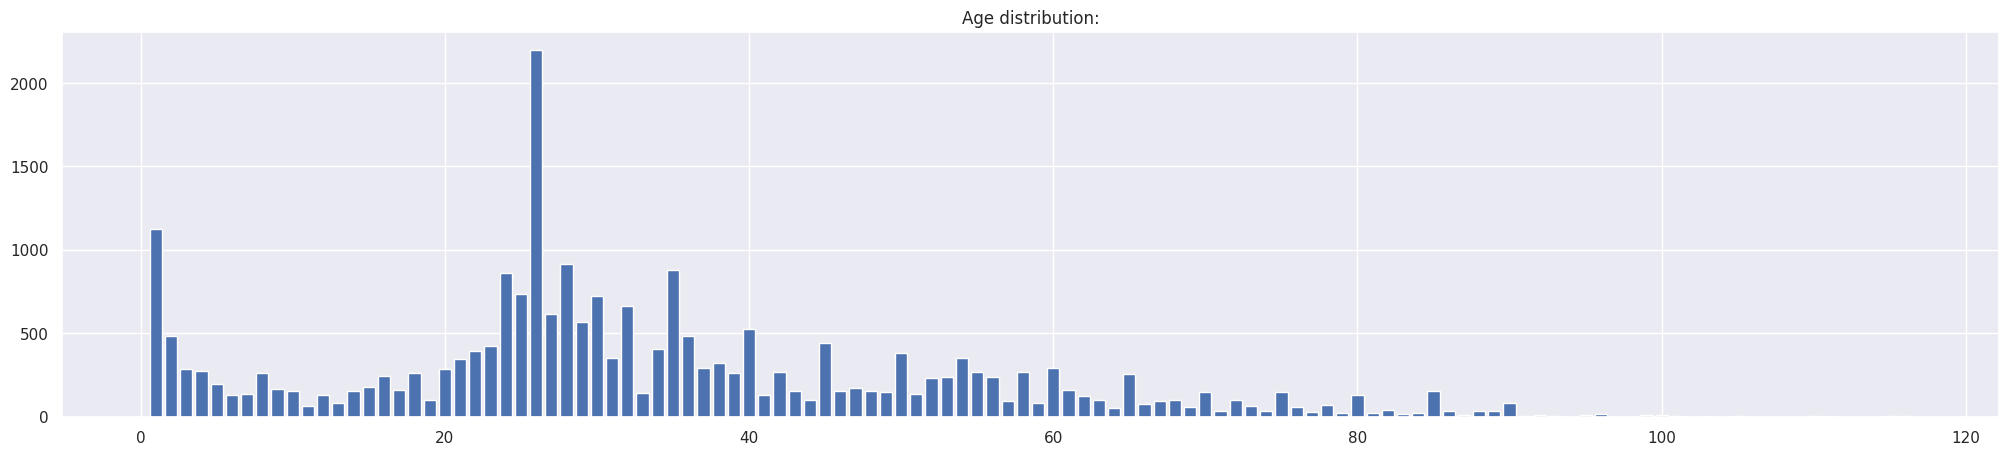

In [ ]:
plt.figure(figsize = (25,5))
age_d = df["age"].value_counts()
plt.bar(age_d.index, age_d.values)
plt.title("Age distribution:")
plt.show()

Highest is between 20-40. <br> The labels are a clear indication of age.

<ipython-input-8-2a528229882e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="age_group", data=df, palette="Set2")


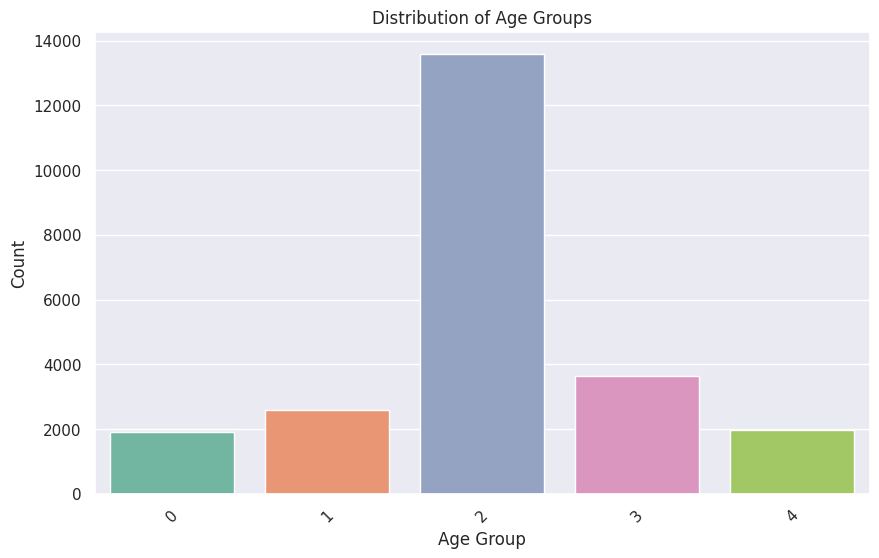

In [ ]:
#"0-2":0, "3-17":1, "18-44":2, "45-63":3, "64-115":4
age_bins = [0, 3, 18, 45, 64, 116]
age_labels = [0,1,2,3,4]
df["age_group"] = pd.cut(df["age"], bins=age_bins, labels=age_labels)

# Plotting age distribution
plt.figure(figsize=(10, 6))
sns.countplot(x="age_group", data=df, palette="Set2")
plt.title("Distribution of Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


In [ ]:
#Dropping the original age column:
df.drop(columns=["age"], inplace=True)
df.head()

,ethnicity,gender,img_name,pixels,age_group
0,2,0,20161219203650636.jpg.chip.jpg,"[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 133...",0
1,2,0,20161219222752047.jpg.chip.jpg,"[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175....",0
2,2,0,20161219222832191.jpg.chip.jpg,"[67.0, 70.0, 71.0, 70.0, 69.0, 67.0, 70.0, 79....",0
3,2,0,20161220144911423.jpg.chip.jpg,"[193.0, 197.0, 198.0, 200.0, 199.0, 200.0, 202...",0
4,2,0,20161220144914327.jpg.chip.jpg,"[202.0, 205.0, 209.0, 210.0, 209.0, 209.0, 210...",0


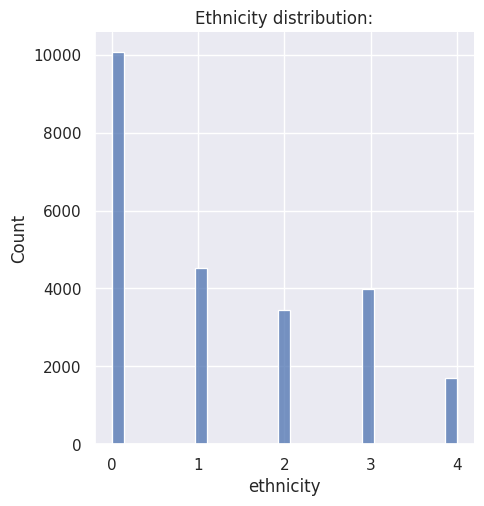

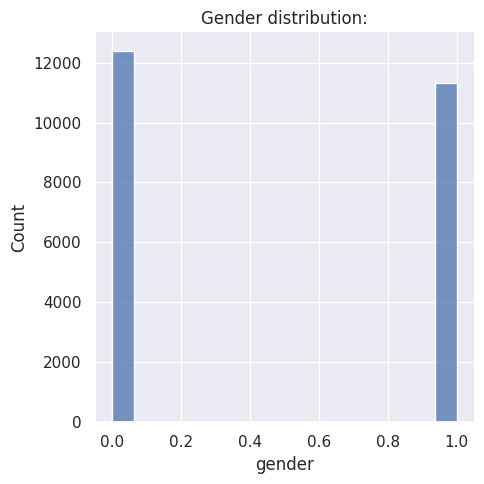

In [ ]:
sns.displot(df["ethnicity"])
plt.title("Ethnicity distribution:")
plt.show()

sns.displot(df["gender"])
plt.title("Gender distribution:")
plt.tight_layout()
plt.show()

The labels for gender are 0 and 1, for enthnicity, it ranges from 0-4.
<br>By looking at the images we can figure out that 'male' is labeled by '0' and 'female' by '1'.
<br> As for ethnicity, this isn't clear.

Normalizing pixel values so it falls between 0 and 1:

In [ ]:
df["pixels"] = df["pixels"].apply(lambda x: x/255)

In [ ]:
df.head()

,ethnicity,gender,img_name,pixels,age_group
0,2,0,20161219203650636.jpg.chip.jpg,"[0.5058824, 0.5019608, 0.5019608, 0.49411765, ...",0
1,2,0,20161219222752047.jpg.chip.jpg,"[0.6431373, 0.2901961, 0.43529412, 0.65882355,...",0
2,2,0,20161219222832191.jpg.chip.jpg,"[0.2627451, 0.27450982, 0.2784314, 0.27450982,...",0
3,2,0,20161220144911423.jpg.chip.jpg,"[0.75686276, 0.77254903, 0.7764706, 0.78431374...",0
4,2,0,20161220144914327.jpg.chip.jpg,"[0.7921569, 0.8039216, 0.81960785, 0.8235294, ...",0


In [ ]:
#Adding all pixels column values into an array:
X = np.array(df["pixels"].tolist())
#1D to 4D array:
#X.shape[0] - Number of images, 48x48 pixel img, 1 - grayscale:
X = X.reshape(X.shape[0], 48, 48, 1)

In [ ]:
#X shape (4D array):
X.shape

(23705, 48, 48, 1)

'X' array is more suitable for CNN.

## Sample images:

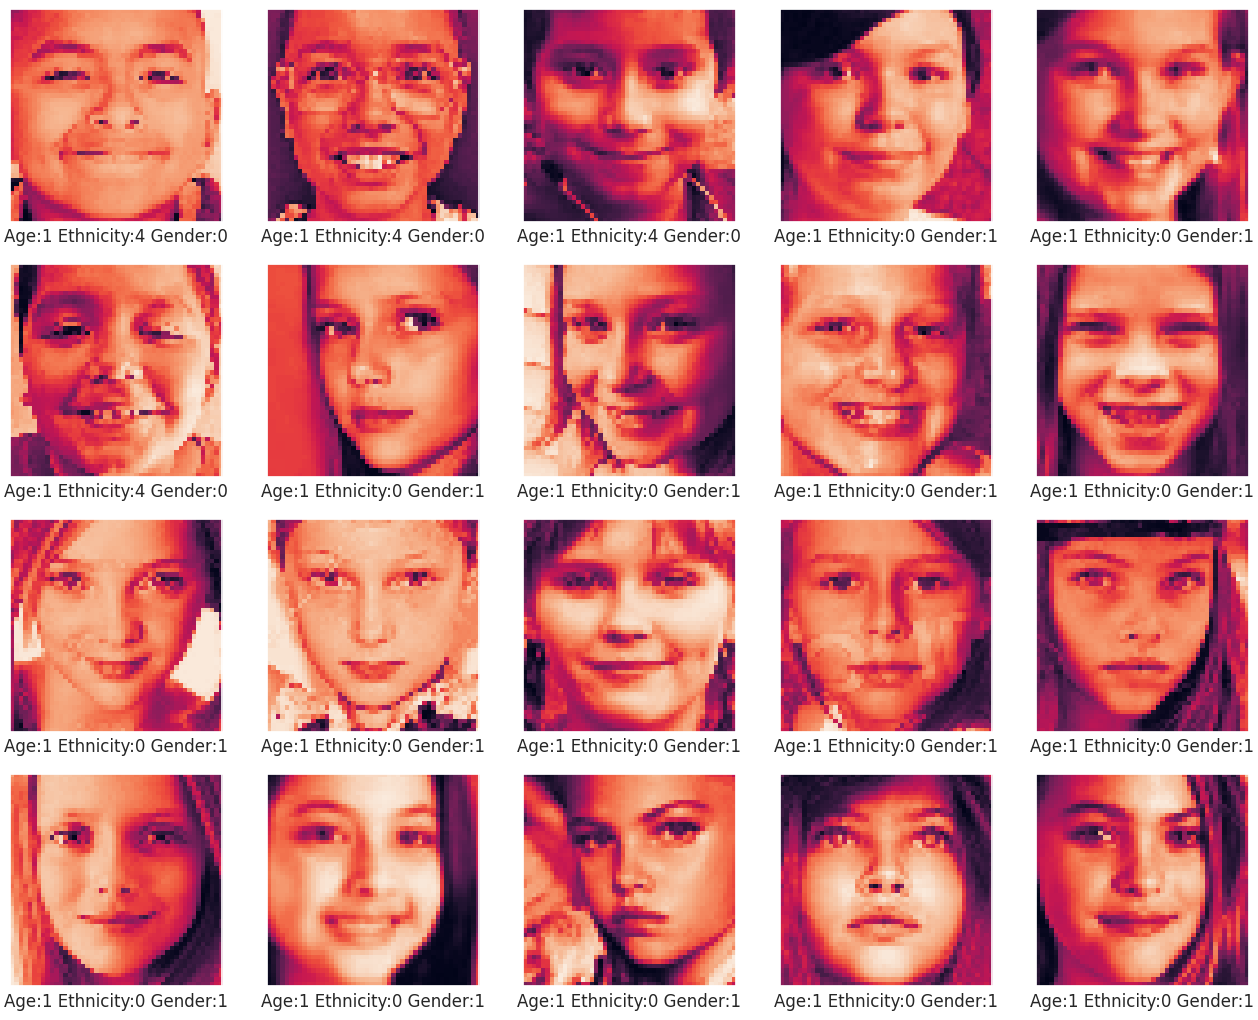

In [ ]:
plt.figure(figsize=(16,16))
for i in range(1500,1520):
    plt.subplot(5,5,(i%25)+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    #Reshape pixel data into 48x48 image:
    plt.imshow(df['pixels'].iloc[i].reshape(48,48))
    plt.xlabel(
    "Age:{}".format(df['age_group'].iloc[i]) +
    " Ethnicity:{}".format(df['ethnicity'].iloc[i]) +
    " Gender:{}".format(df['gender'].iloc[i])
    )

plt.show()

#**Gender Prediction Model:**

##**Split data into train / test:**

In [ ]:
from sklearn.model_selection import train_test_split
y = df["gender"]
#20% data for test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(f"X_train shape = {X_train.shape} and y_train shape = {y_train.shape}")
print(f"\nX_test shape = {X_test.shape} and y_test shape = {y_test.shape}")

X_train shape = (18964, 48, 48, 1) and y_train shape = (18964,)

X_test shape = (4741, 48, 48, 1) and y_test shape = (4741,)


##**Model:**

1. **InputLayer(input_shape = (48,48,1))**: <br>
  Image size 48x48, grayscale(1).<br>
2. **Conv2D(32, (3,3))**: <br>
  Applies 32 filters of size 3x3 to input images, ReLu introduces non linearity. <br>
3. **Conv2D(64, (3,3))**: <br>
  Another convolution layer with 6 filters. <br>
4. **MaxPooling2D((2,2))**: <br>
  Reduces spatial dim of feature maps by 2 (height, width). <br>
5. **Dense(64)**:<br>
  Fully connected layer of 64 neurons.<br>
6. **Dense(1)**:<br>
  Single neuron with sigmoid activation function.


In [ ]:
model_gender = tf.keras.Sequential([
    #This layer defines the input shape for the model:
    L.InputLayer(input_shape=(48,48,1)),
    #1st convolutional layer, ReLu for non linearity:
    L.Conv2D(32, (3, 3), activation='relu'),
    #Normalizes output of previous layer to improve training stability and speed:
    L.BatchNormalization(),
    #Reduces spatial dimensions by factor of 2 so complexity and parameters reduce:
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    #2D feature map to 1D vector:
    L.Flatten(),
    #Adds more non-linearity:
    L.Dense(64, activation='relu'),
    #50% inputs dropped to prevent overfitting:
    L.Dropout(rate=0.5),
    #Sigmoid produces probability score between 0 and 1:
    L.Dense(1, activation='sigmoid')
])


1. **Stochastic Gradient Descent (SGD)**:<br>
 SGD updates the model parameters in the direction of the negative gradient of the loss function with respect to the parameters.<br>
2. **BinaryCrossEntropy**:<br>
  Measures difference between true labels and predicted probabilities. Binary outcome (0 or 1).<br>
3. **Precision**: <br>
  Precision measures the proportion of true positive predictions among all positive predictions made by the model.<br>
  Precision = $\frac{\text{True Positives}}{\text{True Positives} + \text{False Positives}}$<br>
  



##**Compile model:**

In [ ]:
model_gender.compile(optimizer='sgd',
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy', tf.keras.metrics.Precision()])

In [ ]:
#Model summary:
model_gender.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                        

##**Stop to prevent loss:**


**logs.get('val_loss)'**: <br>
This line checks if validation loss of current epoch is less than 0.2650.<br>
Model stops if **True**.

In [ ]:
'''class CallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<0.2400):
            print("\nReached 0.2400 val_loss so cancelling training!")
            self.model.stop_training = True

callback = CallBack()'''

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
# Define the EarlyStopping callback with patience
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)

##**Fitting model:**

In [ ]:
#validation_split = 0.1 => 10% of dataset used for validation set:
fit_model_g = model_gender.fit(X_train, y_train, validation_split = 0.1, callbacks=[early_stopping_callback], epochs = 20, batch_size = 100)

Epoch 1/20
171/171 [==============================] - 59s 338ms/step - loss: 0.5462 - accuracy: 0.7211 - precision: 0.7076 - val_loss: 0.6385 - val_accuracy: 0.8028 - val_precision: 0.8512
Epoch 2/20
171/171 [==============================] - 87s 510ms/step - loss: 0.4308 - accuracy: 0.8096 - precision: 0.8049 - val_loss: 0.5322 - val_accuracy: 0.8387 - val_precision: 0.8239
Epoch 3/20
171/171 [==============================] - 58s 340ms/step - loss: 0.3819 - accuracy: 0.8288 - precision: 0.8247 - val_loss: 0.4050 - val_accuracy: 0.8535 - val_precision: 0.8673
Epoch 4/20
171/171 [==============================] - 60s 349ms/step - loss: 0.3550 - accuracy: 0.8441 - precision: 0.8410 - val_loss: 0.3324 - val_accuracy: 0.8477 - val_precision: 0.8919
Epoch 5/20
171/171 [==============================] - 58s 342ms/step - loss: 0.3320 - accuracy: 0.8542 - precision: 0.8521 - val_loss: 0.3006 - val_accuracy: 0.8614 - val_precision: 0.8604
Epoch 6/20
171/171 [==============================] - 5

In [ ]:
import plotly.express as px
figure = px.line(
    fit_model_g.history, y=["loss", "val_loss"],
    labels={"index": "epoch", "value": "loss"}, title="Training History")
figure.show()

In [ ]:
# Evaluate the model on the test data
results = model_gender.evaluate(X_test, y_test, verbose=0)

# Extract loss and accuracy from the results
loss = results[0]
accuracy = results[1]

# Convert accuracy to percentage
accuracy_percent = accuracy * 100

# Print the test loss and accuracy as percentage
print("Test loss: {}".format(loss))
print("Test Accuracy: {:.2f}%".format(accuracy_percent))


Test loss: 0.26825207471847534
Test Accuracy: 88.76%


##**Saving the model:**

In [ ]:
from tensorflow import keras

model_gender.save('AgeGenEthPred_Gender.keras')

# **Age Prediction:**

## **Splitting Data:**

In [ ]:
from sklearn.model_selection import train_test_split
y = df["age_group"]
#20% data for test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(f"X_train shape = {X_train.shape} and y_train shape = {y_train.shape}")
print(f"\nX_test shape = {X_test.shape} and y_test shape = {y_test.shape}")

X_train shape = (18964, 48, 48, 1) and y_train shape = (18964,)

X_test shape = (4741, 48, 48, 1) and y_test shape = (4741,)


##**Model:**

1. **Adam:** <br>An adaptive learning rate optimization algorithm that combines the advantages of both *AdaGrad* and *RMSProp*. Automatically adjusts the learning rate during training.

2. **MAE:**<br>
Mean absolute error.

In [ ]:
model_age = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    L.BatchNormalization(),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(128, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(1, activation='relu')
])

sgd = tf.keras.optimizers.SGD(momentum=0.9)

model_age.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mae'])

'''
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_loss')<75):
            print("\nReached 100 val_loss so cancelling training!")
            self.model.stop_training = True
'''
from tensorflow.keras.callbacks import EarlyStopping
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=5)
'''
callback = myCallback()
'''
model_age.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 46, 46, 32)        320       
                                                                 
 batch_normalization (Batch  (None, 46, 46, 32)        128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 23, 23, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 10, 10, 64)        0         
 g2D)                                                            
                                                        

##**Fitting Model:**

In [ ]:
#validation_split = 0.1 => 10% of dataset used for validation set:
fit_model_a = model_age.fit(X_train, y_train, validation_split = 0.1, epochs = 30, batch_size = 64, callbacks= early_stopping_callback)

Epoch 1/30
267/267 [==============================] - 88s 309ms/step - loss: 0.7530 - mae: 0.6638 - val_loss: 2.6438 - val_mae: 1.4320
Epoch 2/30
267/267 [==============================] - 71s 266ms/step - loss: 0.5145 - mae: 0.5467 - val_loss: 1.0519 - val_mae: 0.8534
Epoch 3/30
267/267 [==============================] - 73s 272ms/step - loss: 0.4413 - mae: 0.5056 - val_loss: 0.3028 - val_mae: 0.4024
Epoch 4/30
267/267 [==============================] - 72s 270ms/step - loss: 0.3877 - mae: 0.4733 - val_loss: 0.2816 - val_mae: 0.3994
Epoch 5/30
267/267 [==============================] - 71s 267ms/step - loss: 0.3548 - mae: 0.4489 - val_loss: 0.2915 - val_mae: 0.4043
Epoch 6/30
267/267 [==============================] - 73s 272ms/step - loss: 0.3302 - mae: 0.4321 - val_loss: 0.3514 - val_mae: 0.4208
Epoch 7/30
267/267 [==============================] - 72s 270ms/step - loss: 0.3045 - mae: 0.4160 - val_loss: 0.2667 - val_mae: 0.3705
Epoch 8/30
267/267 [==============================] - 7

In [ ]:
import plotly.express as px
fig = px.line(
    fit_model_a.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'},
    title='Training History')
fig.show()

In [ ]:
# Evaluate the model on the test data
results = model_age.evaluate(X_test, y_test, verbose=0)

# Extract loss and accuracy from the results
mse = results[0]
mae = results[1]

print('Test Mean squared error: {}'.format(mse))
print('Test Mean absolute error: {}'.format(mae))

Test Mean squared error: 0.3215821385383606
Test Mean absolute error: 0.4339635968208313


##**Saving the Model:**

In [ ]:
from tensorflow import keras

model_age.save('AgeGenEthPred_Age1.keras')

#**Ethnicity Prediction:**

##**Splitting Data:**

In [ ]:
from sklearn.model_selection import train_test_split
y = df["ethnicity"]
#20% data for test:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

1. While SGD offers more *flexibility* in hyperparameter tuning, RMSprop provides more *stable training*.<br>
2. **Sparse Categorical Cross Entropy:**<br>
Commonly used in classification problems with *integer* labels.
3. If last neuron has *softmax activation function*, the 'from_logits' parameter in 'loss' function is set to false. <br>
4. **Softmax:**<br>
It converts raw scores (logits) into normalized probabilities, ensuring that the sum of the probabilities across all classes is equal to 1.
$\sigma(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$


##**Model:**

In [ ]:
model_eth = tf.keras.Sequential([
    L.InputLayer(input_shape=(48,48,1)),
    L.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    L.MaxPooling2D((2, 2)),
    L.Conv2D(64, (3, 3), activation='relu'),
    L.MaxPooling2D((2, 2)),
    L.Flatten(),
    L.Dense(64, activation='relu'),
    L.Dropout(rate=0.5),
    L.Dense(5, activation = 'softmax')
])

model_eth.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


class CallBack(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('val_accuracy')>0.85):
            print("\nReached 85% val_accuracy so cancelling training!")
            self.model.stop_training = True

callback = CallBack()

model_eth.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 46, 46, 32)        320       
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 23, 23, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_16 (Conv2D)          (None, 21, 21, 64)        18496     
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 10, 10, 64)        0         
 ng2D)                                                           
                                                                 
 flatten_6 (Flatten)         (None, 6400)              0         
                                                                 
 dense_12 (Dense)            (None, 64)               

##**Fitting Model:**

In [ ]:
fit_model_e = model_eth.fit(X_train, y_train, epochs=20, validation_split=0.1, batch_size=100, callbacks=[callback])

Epoch 1/20
171/171 [==============================] - 45s 258ms/step - loss: 1.3334 - accuracy: 0.4748 - val_loss: 1.0877 - val_accuracy: 0.5999
Epoch 2/20
171/171 [==============================] - 44s 257ms/step - loss: 1.0891 - accuracy: 0.5956 - val_loss: 0.9364 - val_accuracy: 0.6816
Epoch 3/20
171/171 [==============================] - 44s 260ms/step - loss: 0.9867 - accuracy: 0.6494 - val_loss: 0.8351 - val_accuracy: 0.7153
Epoch 4/20
171/171 [==============================] - 44s 258ms/step - loss: 0.9360 - accuracy: 0.6712 - val_loss: 0.7755 - val_accuracy: 0.7327
Epoch 5/20
171/171 [==============================] - 44s 258ms/step - loss: 0.8923 - accuracy: 0.6878 - val_loss: 0.7531 - val_accuracy: 0.7422
Epoch 6/20
171/171 [==============================] - 48s 280ms/step - loss: 0.8478 - accuracy: 0.7080 - val_loss: 0.7386 - val_accuracy: 0.7412
Epoch 7/20
171/171 [==============================] - 44s 258ms/step - loss: 0.8159 - accuracy: 0.7176 - val_loss: 0.7193 - val_ac

In [ ]:
fig = px.line(
    fit_model_e.history, y=['loss', 'val_loss'],
    labels={'index': 'epoch', 'value': 'loss'},
    title='Training History')
fig.show()

In [ ]:
# Evaluate the model on the test data
results = model_eth.evaluate(X_test, y_test, verbose=0)

# Extract loss and accuracy from the results
loss = results[0]
accuracy = results[1]

# Convert accuracy to percentage
accuracy_percent = accuracy * 100

# Print the test loss and accuracy as percentage
print("Test loss: {}".format(loss))
print("Test Accuracy: {:.2f}%".format(accuracy_percent))


Test loss: 0.612884521484375
Test Accuracy: 78.84%


#**Save the model:**

In [ ]:
from tensorflow import keras

# Assuming 'model' is your trained model
model_eth.save('AgeGenEthPred_Eth.keras')
